In [188]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance,anova_lm
import copy
import os

Problem 1:

A research laboratory was developing a new compound for the relief of severe cases of hay fever. In an experiment with 36 volunteers, the amounts of the two active ingredients (A & B) in the compound were varied at three levels each. Randomization was used in assigning four volunteers to each of the nine treatments. The data on hours of relief can be found in the following

In [189]:
fever = pd.read_csv('Fever-1.csv')
fever.head()

A  B  Volunteer  Relief
0  1  1          1     2.4
1  1  1          2     2.7
2  1  1          3     2.3
3  1  1          4     2.5
4  1  2          1     4.6

In [190]:
fever.shape

(36, 4)

In [191]:
fever.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          36 non-null     int64  
 1   B          36 non-null     int64  
 2   Volunteer  36 non-null     int64  
 3   Relief     36 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


In [192]:
fever.isnull().sum()

A            0
B            0
Volunteer    0
Relief       0
dtype: int64

In [193]:
fever.duplicated().sum()

0

In [194]:
fever.describe()

A          B  Volunteer     Relief
count  36.000000  36.000000  36.000000  36.000000
mean    2.000000   2.000000   2.500000   7.183333
std     0.828079   0.828079   1.133893   3.272090
min     1.000000   1.000000   1.000000   2.300000
25%     1.000000   1.000000   1.750000   4.675000
50%     2.000000   2.000000   2.500000   6.000000
75%     3.000000   3.000000   3.250000   9.325000
max     3.000000   3.000000   4.000000  13.500000

In [195]:
fever.A = pd.Categorical(fever.A)
fever.B = pd.Categorical(fever.B)
fever.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   A          36 non-null     category
 1   B          36 non-null     category
 2   Volunteer  36 non-null     int64   
 3   Relief     36 non-null     float64 
dtypes: category(2), float64(1), int64(1)
memory usage: 984.0 bytes


1.1) State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘A’ and ‘B’ individually. [both statement and statistical form like Ho=mu, Ha>mu]

Hypothesis for A -

Ho : The relief hours do not differ by the levels of ingredient A 

Ha : The relief hours differs by the levels of ingredient A


Ho : mu1 = mu2 = mu3

Ha : mu1 != mu2 != mu3
    
Hypothesis for B -

Ho : The relief hours do not differ by the levels of ingredient B

Hb : The relief hours differs by the levels of ingredient B

Ho : mu1 = mu2 = mu3

Hb : mu1 != mu2 != mu3


1.2) Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [9]:
formula = 'Relief ~ C(A)'
model = ols(formula, fever).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


Since p-value(4.578242e-07) < alpha(0.05), null hypothesis is rejected

Therefore , the relief hours significantly differ across the levels of the ingredient A

1.3) Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [10]:
formula = 'Relief ~ C(B)'
model = ols(formula, fever).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


Since p-value(0.00135) < alpha(0.05), null hypothesis is rejected

Therefore , the relief hours significantly differ across the levels of the ingredient B

1.4) Analyse the effects of one variable on another with the help of an interaction plot.
What is the interaction between the two treatments?

In [11]:
fever.columns

Index(['A', 'B', 'Volunteer', 'Relief'], dtype='object')

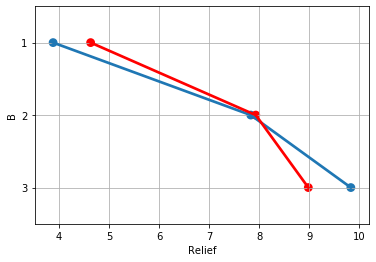

In [198]:
sns.pointplot(x = 'Relief', y = 'A',data=fever,ci=None)
sns.pointplot(x = 'Relief', y = 'B' , data=fever,ci=None,color='Red')
plt.grid()
plt.show()

The plot suggests that there is interaction between the levels of ingredient A and ingredient B.

1.5) Perform a two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’ along with their interaction 'A*B') with the variable 'Relief' and state your results.

Ho : There is no interaction between the levels of ingredient A and ingredient B

Ha : There is interaction between the levels of ingredient A and ingredient B

In [14]:
model=ols('Relief ~ C(A) + C(B) + C(A):C(B)', data=fever).fit()
aov_table=anova_lm(model)
print(aov_table)

             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN


Since p-value(6.972083e-17) < alpha(0.05), null hypothesis is rejected

Therefore we can conclude that there is significant interaction between the levels of ingredient A and ingredient B.

1.6) Mention the business implications of performing ANOVA for this particular case study.


In [ ]:
The business implications are -
1) It gives effect of different levels ingredient A on the relief hours
2) Similarly, it gives effect of different levels ingredient B on the relief hours
3) It gives effect on relief hours also when different levels of ingredients are used together in the compound.

Using this information manufacturer can add or remove proportion of ingrediemts from the compound for better/long relief.

Problem 2:

The dataset Education - Post 12th Standard.csv is a dataset that contains the names of various colleges. This particular case study is based on various parameters of various institutions. You are expected to do Principal Component Analysis for this case study according to the instructions given in the following rubric. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

2.1) Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. The inferences drawn from this should be properly documented.

In [201]:
data = pd.read_csv('Education - Post 12th Standard-1.csv')
data.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [202]:
data.shape

(777, 18)

In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [204]:
data.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [205]:
data.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

In [210]:
data.duplicated().sum()


0

# Univariate Analysis except class Names


In [61]:
data.columns

Index(['Names', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

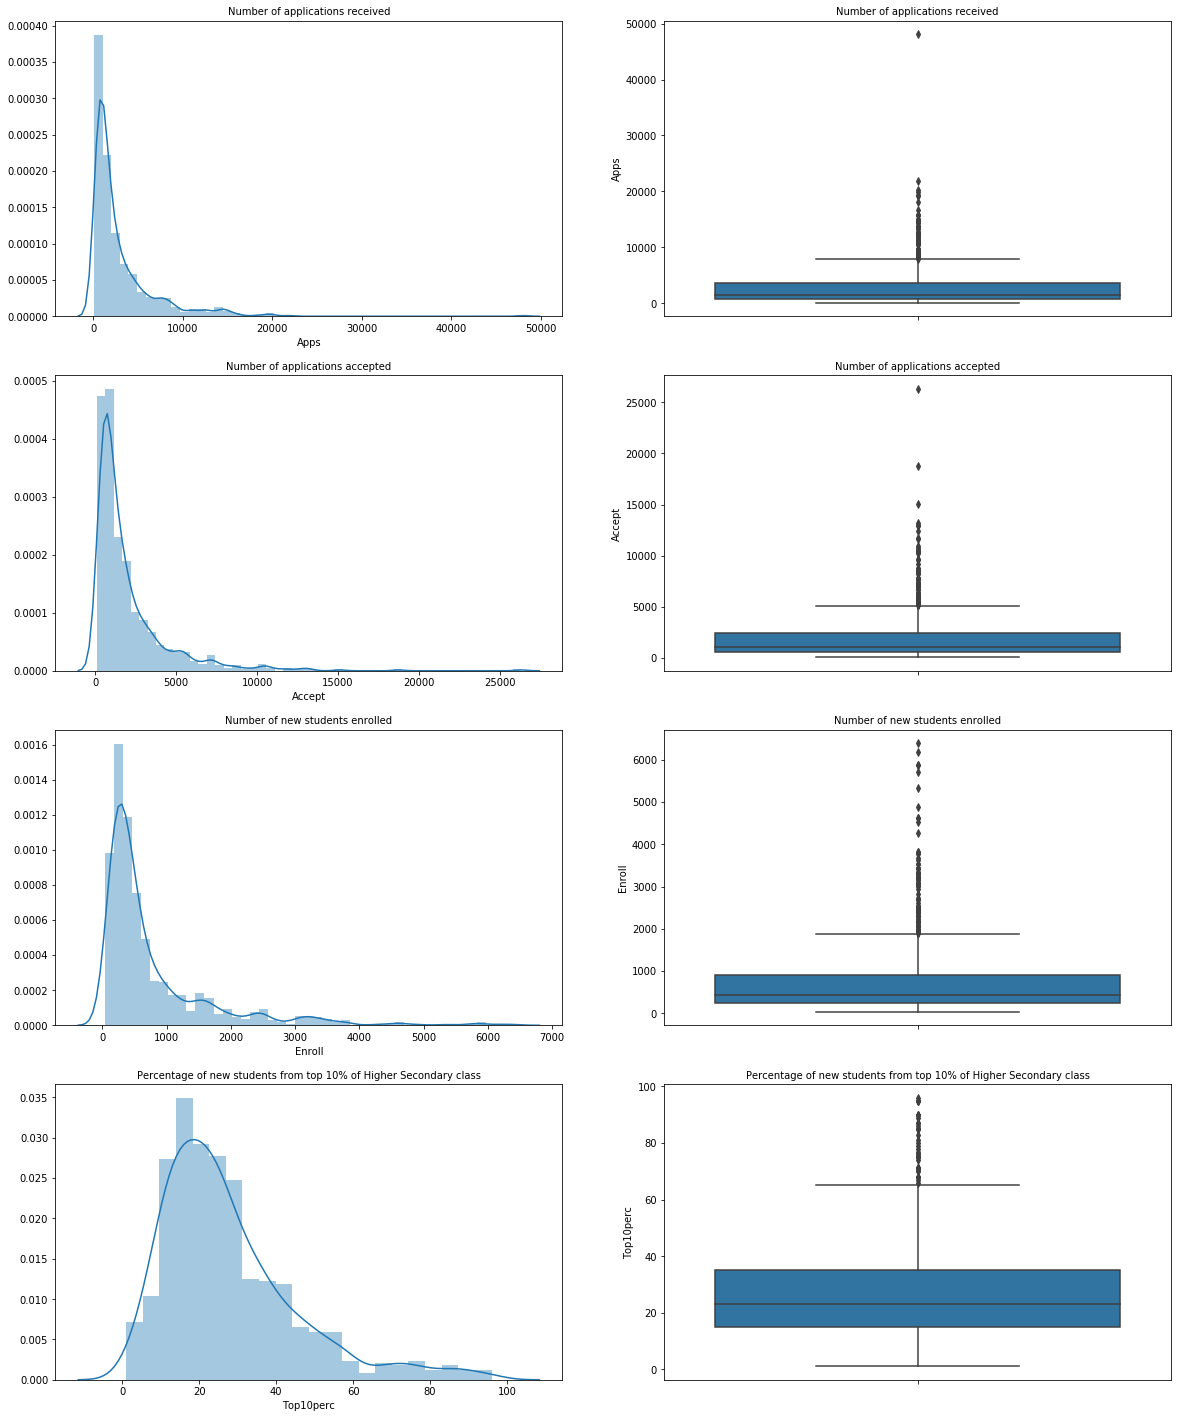

In [62]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20, 25)

a = sns.distplot(data['Apps'] , ax=axes[0][0])
a.set_title("Number of applications received",fontsize=10)
a = sns.boxplot(data['Apps'] , orient = "v" , ax=axes[0][1])
a.set_title("Number of applications received",fontsize=10)

a = sns.distplot(data['Accept'] , ax=axes[1][0])
a.set_title("Number of applications accepted",fontsize=10)
a = sns.boxplot(data['Accept'] , orient = "v" , ax=axes[1][1])
a.set_title("Number of applications accepted",fontsize=10)


a = sns.distplot(data['Enroll'] , ax=axes[2][0])
a.set_title("Number of new students enrolled",fontsize=10)
a = sns.boxplot(data['Enroll'] , orient = "v" , ax=axes[2][1])
a.set_title("Number of new students enrolled",fontsize=10)


a = sns.distplot(data['Top10perc'] , ax=axes[3][0])
a.set_title("Percentage of new students from top 10% of Higher Secondary class",fontsize=10)
a = sns.boxplot(data['Top10perc'] , orient = "v" , ax=axes[3][1])
a.set_title("Percentage of new students from top 10% of Higher Secondary class",fontsize=10)

plt.show()

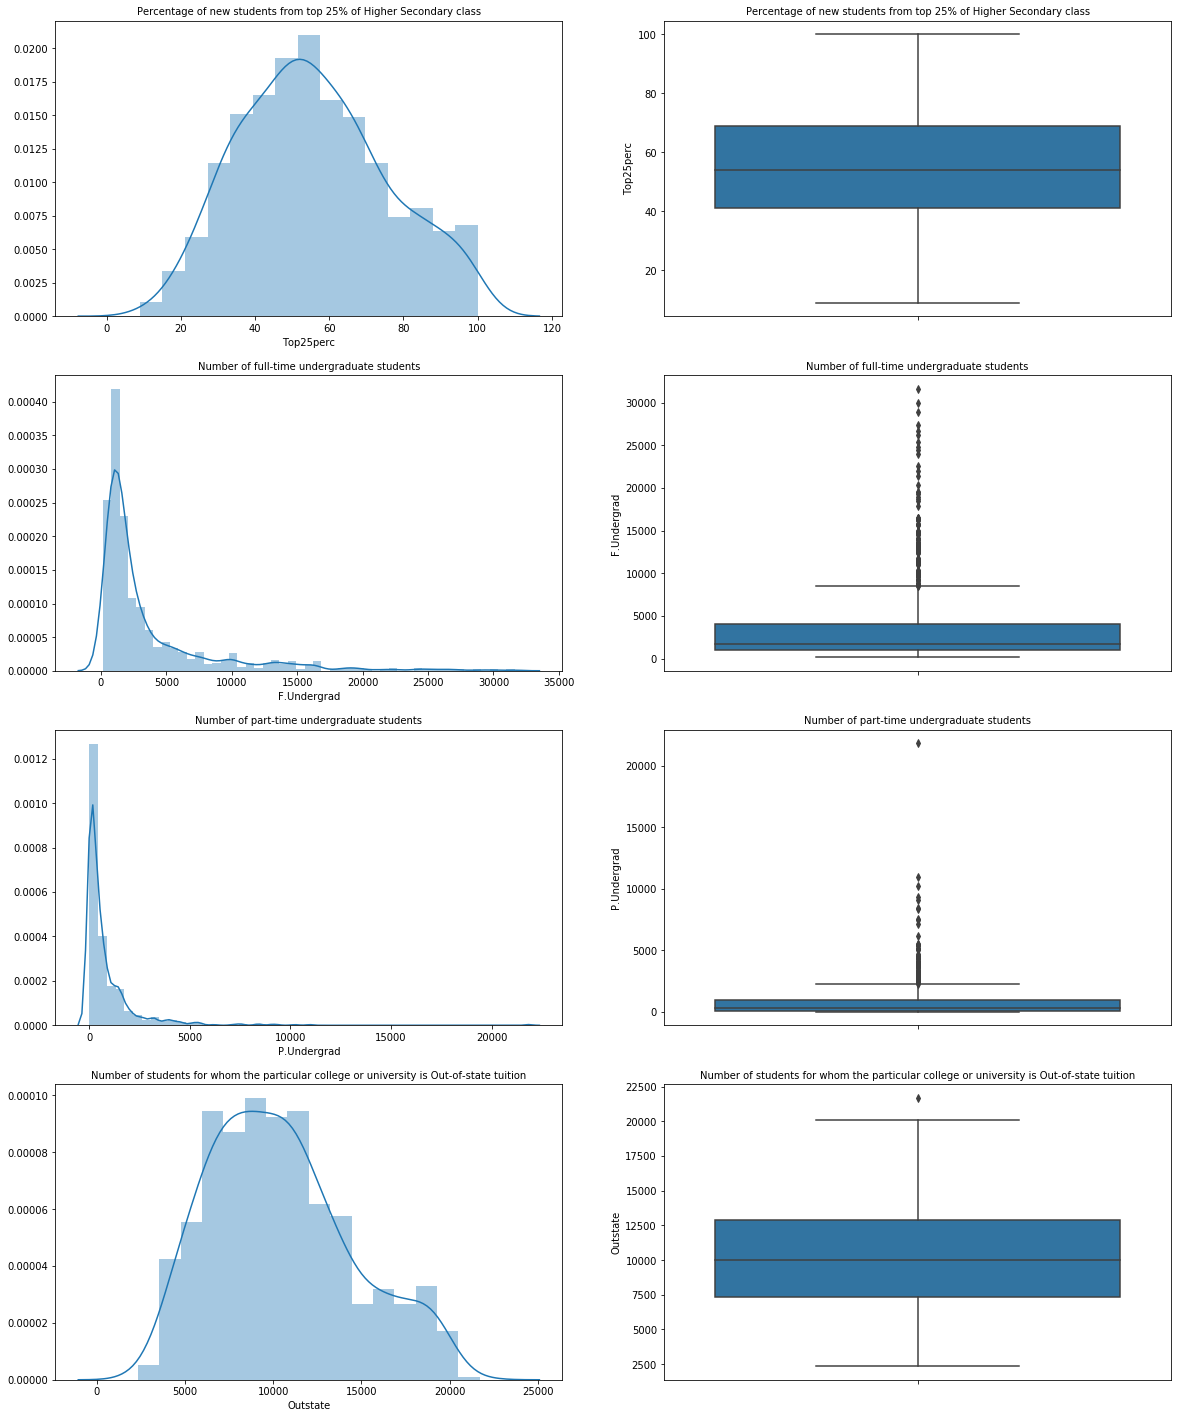

In [9]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20, 25)

a = sns.distplot(data['Top25perc'] , ax=axes[0][0])
a.set_title("Percentage of new students from top 25% of Higher Secondary class",fontsize=10)
a = sns.boxplot(data['Top25perc'] , orient = "v" , ax=axes[0][1])
a.set_title("Percentage of new students from top 25% of Higher Secondary class",fontsize=10)


a = sns.distplot(data['F.Undergrad'] , ax=axes[1][0])
a.set_title("Number of full-time undergraduate students",fontsize=10)
a = sns.boxplot(data['F.Undergrad'] , orient = "v" , ax=axes[1][1])
a.set_title("Number of full-time undergraduate students",fontsize=10)


a = sns.distplot(data['P.Undergrad'] , ax=axes[2][0])
a.set_title("Number of part-time undergraduate students",fontsize=10)
a = sns.boxplot(data['P.Undergrad'] , orient = "v" , ax=axes[2][1])
a.set_title("Number of part-time undergraduate students",fontsize=10)


a = sns.distplot(data['Outstate'] , ax=axes[3][0])
a.set_title("Number of students for whom the particular college or university is Out-of-state tuition",fontsize=10)
a = sns.boxplot(data['Outstate'] , orient = "v" , ax=axes[3][1])
a.set_title("Number of students for whom the particular college or university is Out-of-state tuition",fontsize=10)

plt.show()

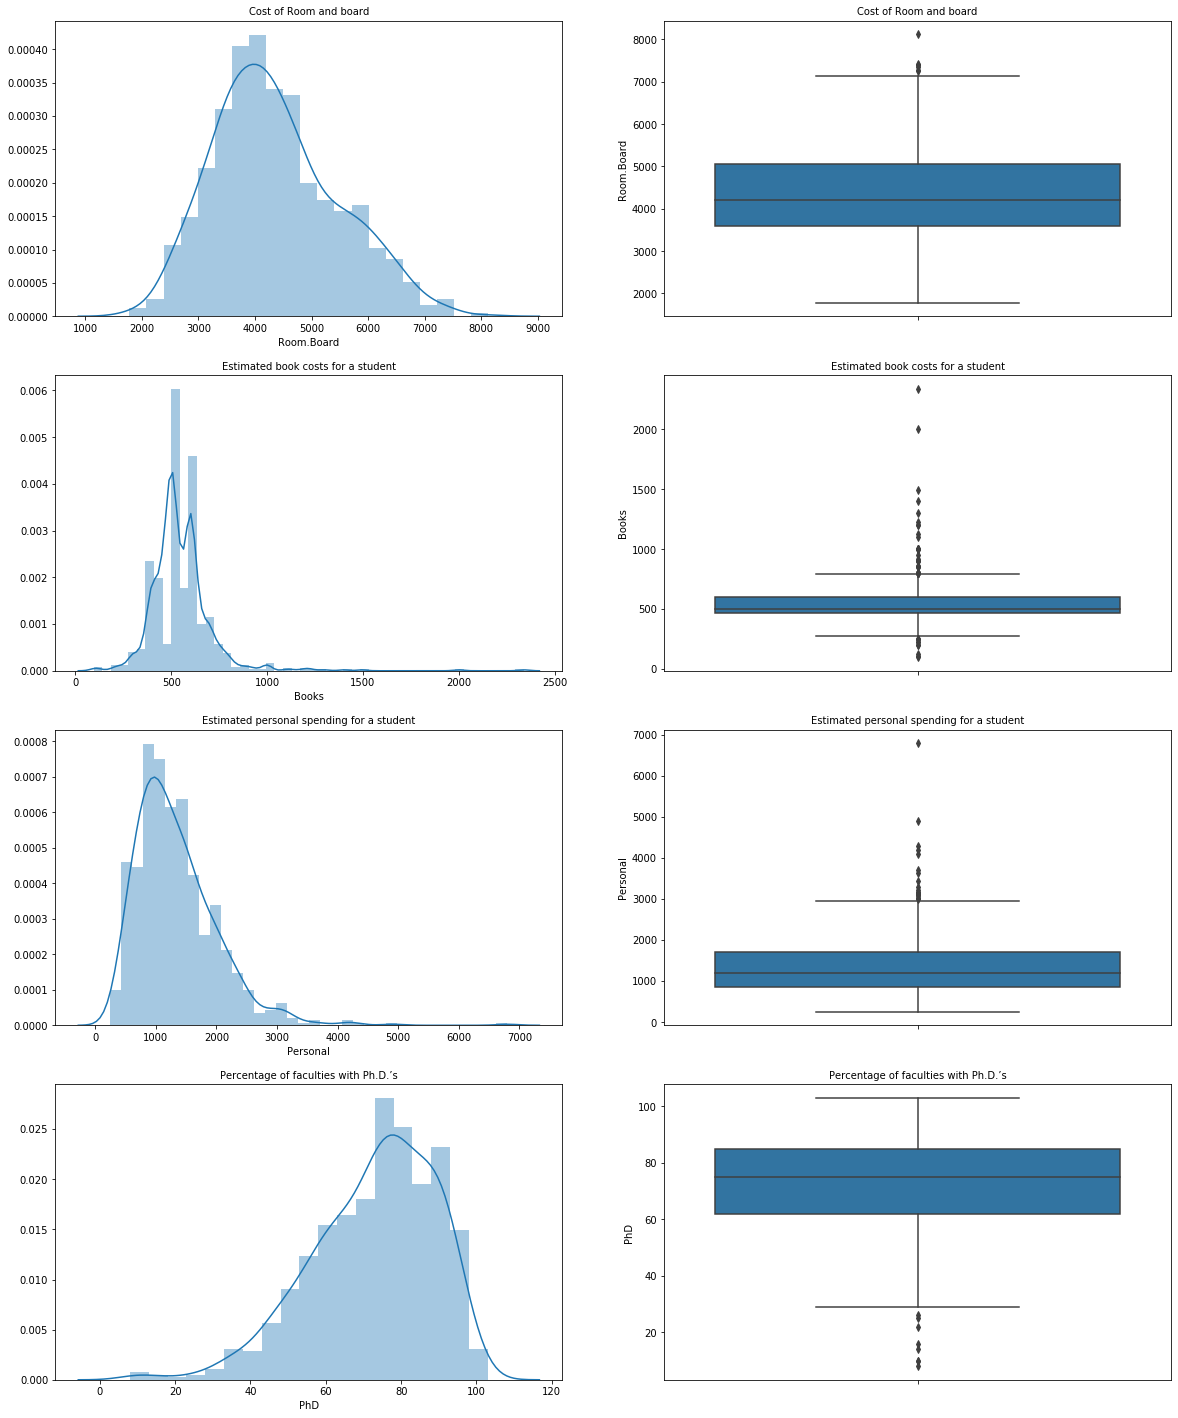

In [10]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20, 25)

a = sns.distplot(data['Room.Board'] , ax=axes[0][0])
a.set_title("Cost of Room and board",fontsize=10)
a = sns.boxplot(data['Room.Board'] , orient = "v" , ax=axes[0][1])
a.set_title("Cost of Room and board",fontsize=10)


a = sns.distplot(data['Books'] , ax=axes[1][0])
a.set_title("Estimated book costs for a student",fontsize=10)
a = sns.boxplot(data['Books'] , orient = "v" , ax=axes[1][1])
a.set_title("Estimated book costs for a student",fontsize=10)


a = sns.distplot(data['Personal'] , ax=axes[2][0])
a.set_title("Estimated personal spending for a student",fontsize=10)
a = sns.boxplot(data['Personal'] , orient = "v" , ax=axes[2][1])
a.set_title("Estimated personal spending for a student",fontsize=10)


a = sns.distplot(data['PhD'] , ax=axes[3][0])
a.set_title("Percentage of faculties with Ph.D.’s",fontsize=10)
a = sns.boxplot(data['PhD'] , orient = "v" , ax=axes[3][1])
a.set_title("Percentage of faculties with Ph.D.’s",fontsize=10)

plt.show()

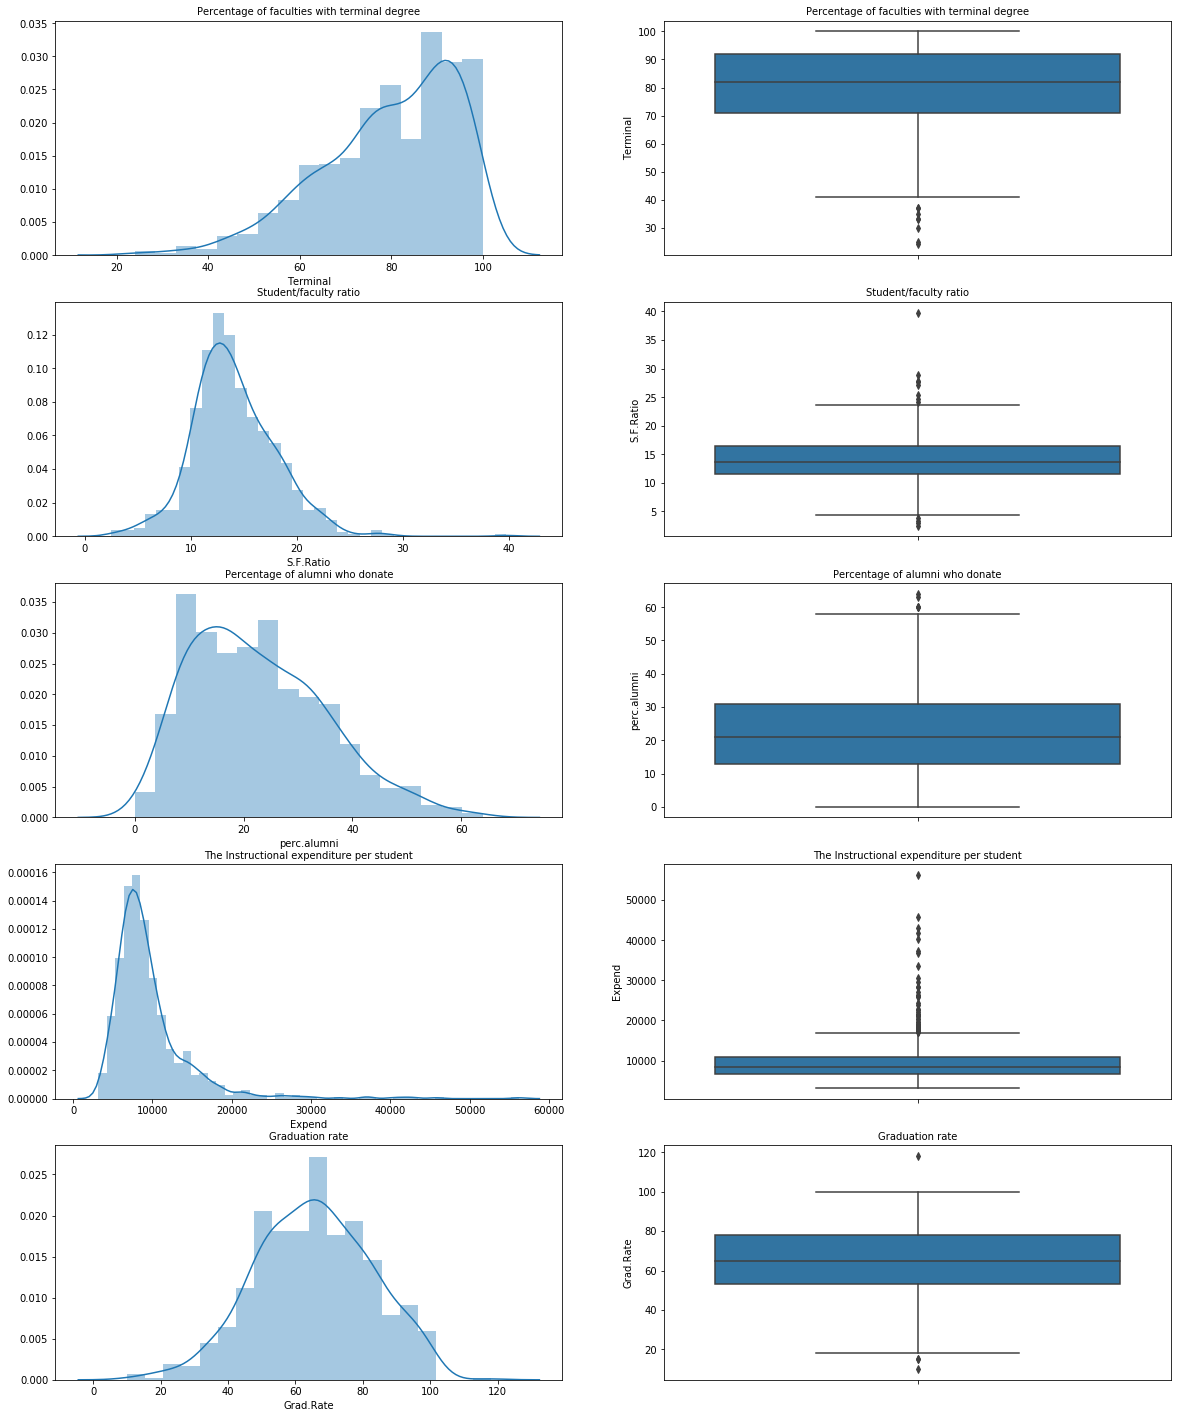

In [11]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(20, 25)

a = sns.distplot(data['Terminal'] , ax=axes[0][0])
a.set_title("Percentage of faculties with terminal degree",fontsize=10)
a = sns.boxplot(data['Terminal'] , orient = "v" , ax=axes[0][1])
a.set_title("Percentage of faculties with terminal degree",fontsize=10)


a = sns.distplot(data['S.F.Ratio'] , ax=axes[1][0])
a.set_title("Student/faculty ratio",fontsize=10)
a = sns.boxplot(data['S.F.Ratio'] , orient = "v" , ax=axes[1][1])
a.set_title("Student/faculty ratio",fontsize=10)


a = sns.distplot(data['perc.alumni'] , ax=axes[2][0])
a.set_title("Percentage of alumni who donate",fontsize=10)
a = sns.boxplot(data['perc.alumni'] , orient = "v" , ax=axes[2][1])
a.set_title("Percentage of alumni who donate",fontsize=10)


a = sns.distplot(data['Expend'] , ax=axes[3][0])
a.set_title("The Instructional expenditure per student",fontsize=10)
a = sns.boxplot(data['Expend'] , orient = "v" , ax=axes[3][1])
a.set_title("The Instructional expenditure per student",fontsize=10)


a = sns.distplot(data['Grad.Rate'] , ax=axes[4][0])
a.set_title("Graduation rate",fontsize=10)
a = sns.boxplot(data['Grad.Rate'] , orient = "v" , ax=axes[4][1])
a.set_title("Graduation rate",fontsize=10)

plt.show()

# Multi Variate Analysis

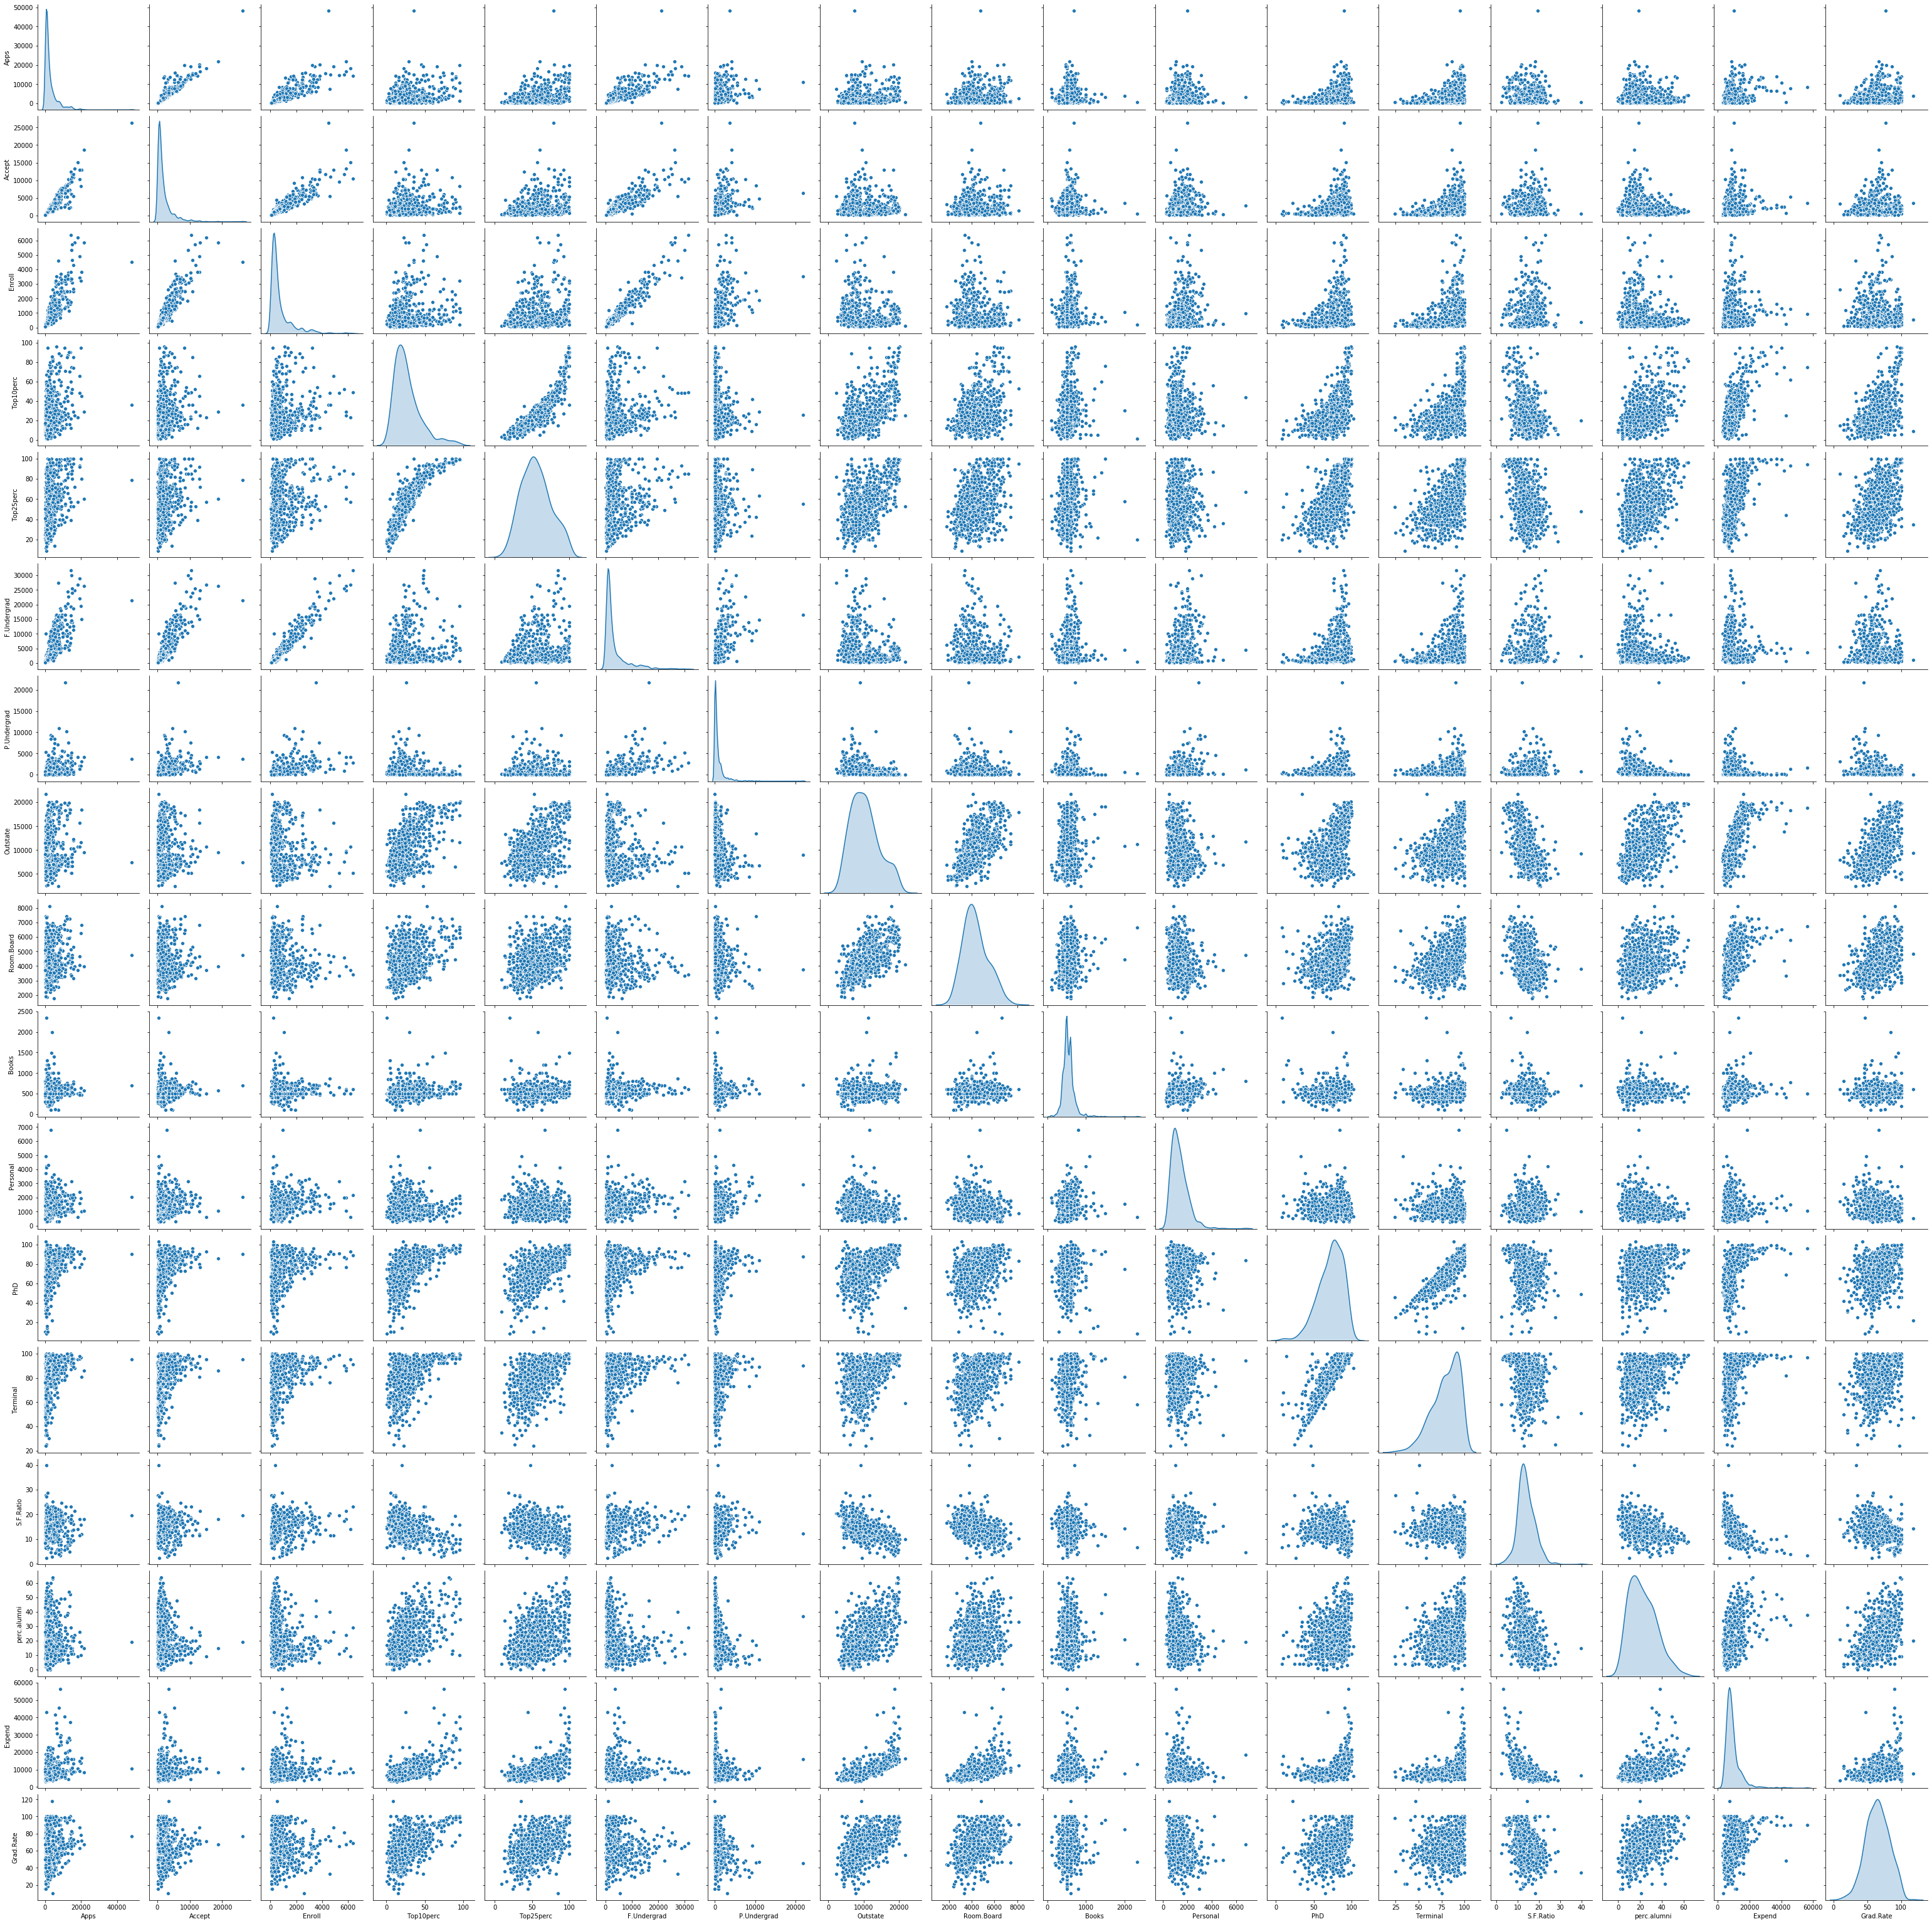

In [87]:

sns.pairplot(data,diag_kind='kde')
plt.show()

In [106]:
data.corr(method='pearson')

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

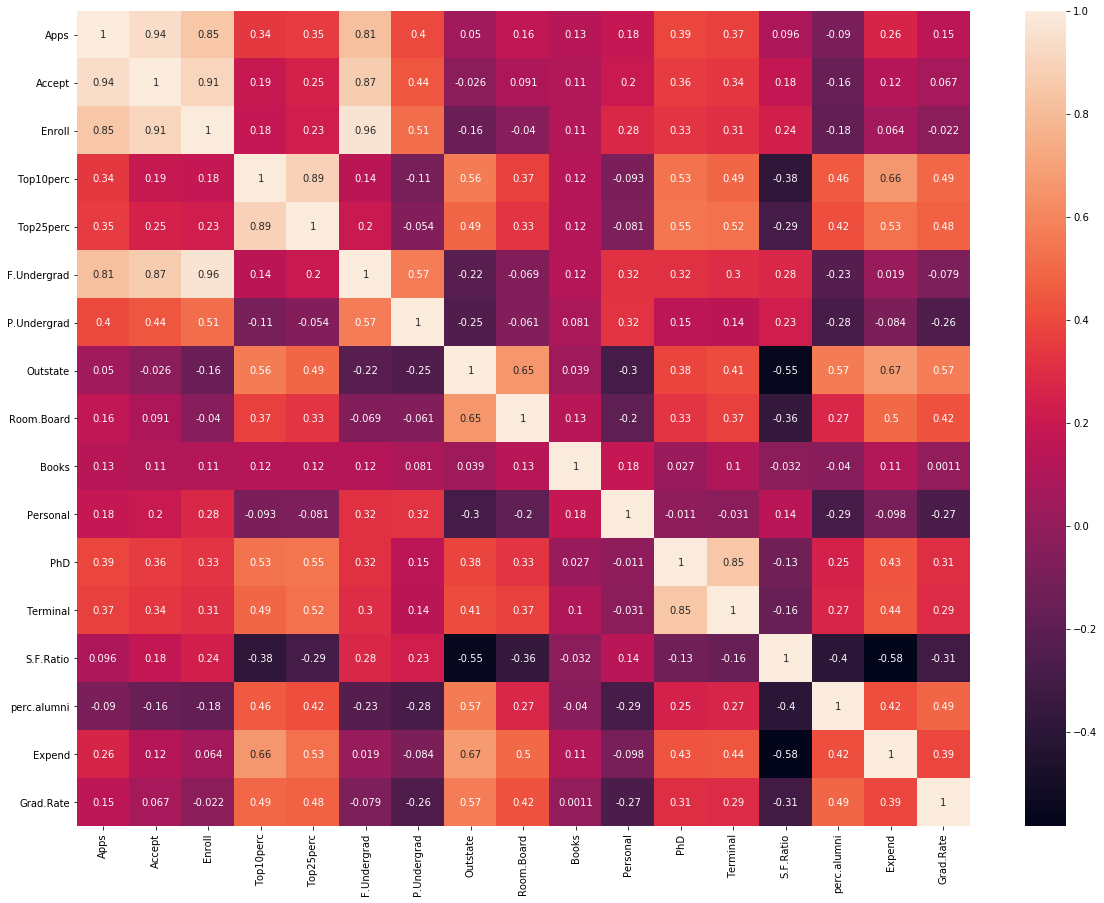

In [107]:
plt.subplots(figsize=(20,15))
sns.heatmap(data.corr(), annot=True)

2.2) Scale the variables and write the inference for using the type of scaling function for this case study. 


In [108]:
# Since Names column has unique values , so will remove it from the dataset.
data_new=data.drop(["Names"],axis=1)

In [109]:
data_new.head()

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  1660    1232     721         23         52         2885          537   
1  2186    1924     512         16         29         2683         1227   
2  1428    1097     336         22         50         1036           99   
3   417     349     137         60         89          510           63   
4   193     146      55         16         44          249          869   

   Outstate  Room.Board  Books  Personal  PhD  Terminal  S.F.Ratio  \
0      7440        3300    450      2200   70        78       18.1   
1     12280        6450    750      1500   29        30       12.2   
2     11250        3750    400      1165   53        66       12.9   
3     12960        5450    450       875   92        97        7.7   
4      7560        4120    800      1500   76        72       11.9   

   perc.alumni  Expend  Grad.Rate  
0           12    7041         60  
1           16   10527         56  
2           30    8735         54  
3           37   19016         59  
4            2   10922         15

In [110]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler(copy=True, with_mean=True, with_std=True)

In [111]:
from scipy.stats import zscore
data_new=data_new.apply(zscore)
data_new.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

In [112]:
data_new.describe()

Apps        Accept        Enroll     Top10perc     Top25perc  \
count  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02   
mean   6.355797e-17  6.774575e-17 -5.249269e-17 -2.753232e-17 -1.546739e-16   
std    1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00   
min   -7.551337e-01 -7.947645e-01 -8.022728e-01 -1.506526e+00 -2.364419e+00   
25%   -5.754408e-01 -5.775805e-01 -5.793514e-01 -7.123803e-01 -7.476067e-01   
50%   -3.732540e-01 -3.710108e-01 -3.725836e-01 -2.585828e-01 -9.077663e-02   
75%    1.609122e-01  1.654173e-01  1.314128e-01  4.221134e-01  6.671042e-01   
max    1.165867e+01  9.924816e+00  6.043678e+00  3.882319e+00  2.233391e+00   

        F.Undergrad   P.Undergrad      Outstate    Room.Board         Books  \
count  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02   
mean  -1.661405e-16 -3.029180e-17  6.515595e-17  3.570717e-16 -2.192583e-16   
std    1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00   
min   -7.346169e-01 -5.615022e-01 -2.014878e+00 -2.351778e+00 -2.747779e+00   
25%   -5.586426e-01 -4.997191e-01 -7.762035e-01 -6.939170e-01 -4.810994e-01   
50%   -4.111378e-01 -3.301442e-01 -1.120949e-01 -1.437297e-01 -2.992802e-01   
75%    6.294077e-02  7.341765e-02  6.179271e-01  6.318245e-01  3.067838e-01   
max    5.764674e+00  1.378992e+01  2.800531e+00  3.436593e+00  1.085230e+01   

           Personal           PhD      Terminal     S.F.Ratio   perc.alumni  \
count  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02   
mean   4.765243e-17  5.954768e-17 -4.481615e-16 -2.057556e-17 -6.022638e-17   
std    1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00   
min   -1.611860e+00 -3.962596e+00 -3.785982e+00 -2.929799e+00 -1.836580e+00   
25%   -7.251203e-01 -6.532948e-01 -5.915023e-01 -6.546598e-01 -7.868237e-01   
50%   -2.078552e-01  1.433889e-01  1.561419e-01 -1.237939e-01 -1.408197e-01   
75%    5.310950e-01  7.562224e-01  8.358184e-01  6.093067e-01  6.666852e-01   
max    8.068387e+00  1.859323e+00  1.379560e+00  6.499390e+00  3.331452e+00   

             Expend     Grad.Rate  
count  7.770000e+02  7.770000e+02  
mean   1.213101e-16  3.886495e-16  
std    1.000644e+00  1.000644e+00  
min   -1.240641e+00 -3.230876e+00  
25%   -5.574826e-01 -7.260193e-01  
50%   -2.458933e-01 -2.698956e-02  
75%    2.241735e-01  7.302926e-01  
max    8.924721e+00  3.060392e+00

2.3) Comment on the comparison between covariance and the correlation matrix.



In [113]:
cov_matrix = np.cov(data_new.T)
print('Covarinace Matrix \n%s',cov_matrix)

Covarinace Matrix 
%s [[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.2599265   0.14694372]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.12487773  0.06739929]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711  0.06425192 -0.02236983]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.6617651   0.49562711]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.08091441

Comparing Correlation and Covarince Matrix

In [114]:
# Now without Scaling lets check out correlation matrix

data_corr = data.copy()
data.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

In [115]:
#With standardisation
data_new.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

With and Without standardisation, correlation matrix yields same result


2.4) Check the dataset for outliers before and after scaling. Draw your inferences from this exercise.



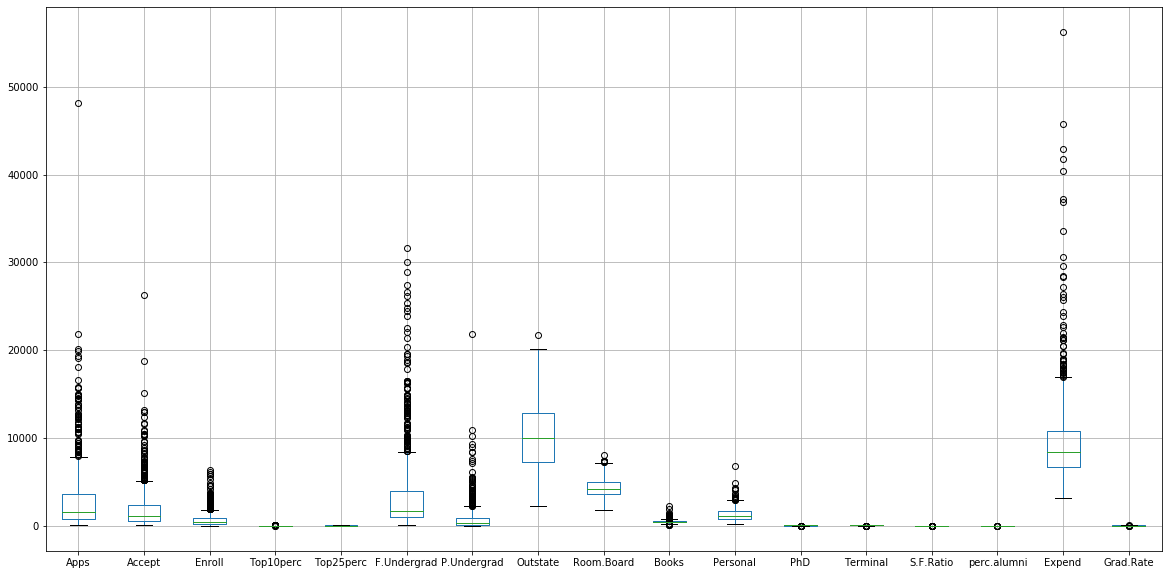

In [116]:
#Dataset before sacaling

data.boxplot(figsize=(20,10))

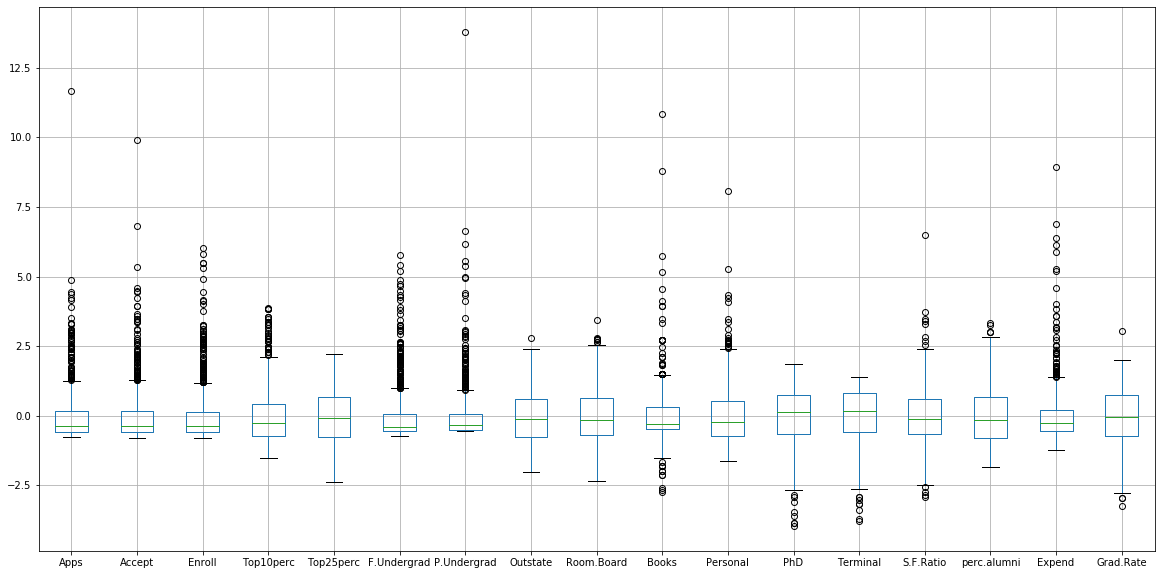

In [119]:
#Dataset after sacaling

data_new.boxplot(figsize=(20,10))

In [132]:
#Remove outliers

def find_whiskers(col):
    sorted(col)
    Q1 , Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range , upper_range

for col in ['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'] :
    lwrange , uprange = find_whiskers(data_new[col])
    data_new[col] = np.where(data_new[col] > uprange , uprange , data_new[col])
    data_new[col] = np.where(data_new[col] < lwrange , lwrange , data_new[col])

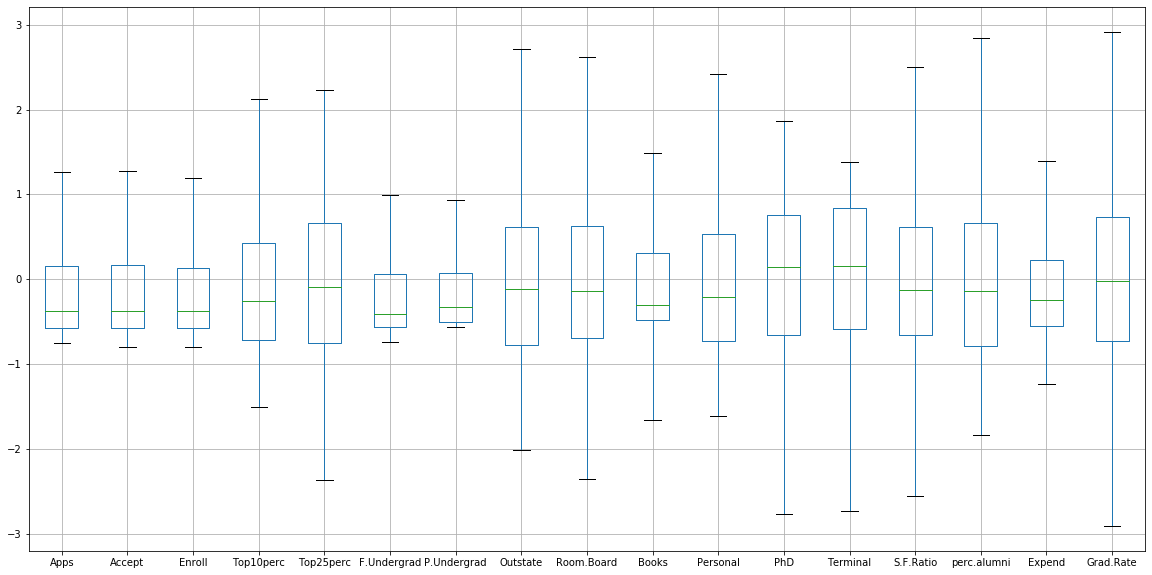

In [133]:
#Boxplot after outlier treatment

data_new.boxplot(figsize=(20,10))

2.5) Build the covariance matrix, eigenvalues, and eigenvector.



In [135]:
# Step 1 - Create covariance matrix

cov_matrix = np.cov(data_new.T)
print('Covariance Matrix \n%s', cov_matrix)


Covariance Matrix 
%s [[ 3.92202587e-01  3.72045278e-01  3.44861102e-01  1.77882547e-01
   2.28413447e-01  3.00372860e-01  1.53261035e-01  4.09309446e-02
   1.16838149e-01  1.03276949e-01  1.29720101e-01  2.84046975e-01
   2.67661215e-01  7.57322866e-02 -6.30526007e-02  9.90236070e-02
   9.43096150e-02]
 [ 3.72045278e-01  3.86719034e-01  3.57101106e-01  1.22742172e-01
   1.70302604e-01  3.10747826e-01  1.67663695e-01 -3.11176328e-03
   7.40055439e-02  9.06387432e-02  1.43597630e-01  2.59812502e-01
   2.46777922e-01  1.12140752e-01 -1.02443762e-01  6.54924734e-02
   4.90474515e-02]
 [ 3.44861102e-01  3.57101106e-01  3.76969419e-01  9.32127566e-02
   1.41572482e-01  3.30838988e-01  1.85453496e-01 -9.55996485e-02
  -1.45695116e-02  8.66382517e-02  1.87681520e-01  2.29023882e-01
   2.14034520e-01  1.61090704e-01 -1.36102632e-01  2.16676723e-02
  -1.42555842e-02]
 [ 1.77882547e-01  1.22742172e-01  9.32127566e-02  7.81305061e-01
   8.08308058e-01  5.47613345e-02 -7.49074558e-02  4.97059995e-

In [136]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.0929684   0.32104652  0.06660652 -0.0129432   0.24674827 -0.00650339
   0.2400326  -0.13180129 -0.01773119 -0.03400089  0.14346037 -0.59269472
   0.5569348   0.03784437  0.22445438  0.11116423 -0.00914552]
 [ 0.06592707  0.3319699   0.07883241 -0.03420729  0.22877472 -0.02487384
   0.27288698 -0.12917757 -0.0195307  -0.06133927 -0.32336365  0.70710813
   0.26755069  0.00907891  0.17576693  0.15058739  0.00281244]
 [ 0.03166929  0.35033549  0.01381154 -0.01122623  0.19114851 -0.03094669
   0.26523924 -0.12023338 -0.00760842 -0.00639234  0.69930928  0.13493584
  -0.49315933 -0.01188448  0.04255122  0.01589244  0.02985794]
 [ 0.33452816  0.06754279 -0.32328505  0.21141739  0.07741651  0.32096376
  -0.09974811  0.02170441  0.13379303 -0.00700079 -0.0310452   0.02159112
   0.00901027  0.08516089  0.14064341 -0.29511711  0.69375696]
 [ 0.36427546  0.13142781 -0.41399578  0.19443136  0.11797053  0.37686172
  -0.18713202  0.01531995  0.18486533  0.12749803  0.00890279  0

2.6) Write the explicit form of the first PC (in terms of Eigen Vectors).


In [187]:
df_comp = pd.DataFrame(pca.components_,columns=list(data_new))
df_comp

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0  0.092968  0.065927  0.031669   0.334528   0.364275     0.011499   
1  0.321047  0.331970  0.350335   0.067543   0.131428     0.324528   
2  0.066607  0.078832  0.013812  -0.323285  -0.413996     0.021938   
3 -0.012943 -0.034207 -0.011226   0.211417   0.194431    -0.017449   
4  0.246748  0.228775  0.191149   0.077417   0.117971     0.150299   
5  0.006503  0.024874  0.030947  -0.320964  -0.376862     0.016986   
6 -0.240033 -0.272887 -0.265239   0.099748   0.187132    -0.210218   
7  0.131801  0.129178  0.120233  -0.021704  -0.015320     0.100211   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.046224  0.378302    0.297775  0.040125 -0.109441  0.312415  0.315636   
1     0.209729 -0.206652   -0.073831  0.133957  0.293863  0.307282  0.289238   
2     0.103897  0.244601    0.654355  0.069323  0.029062  0.010519  0.075341   
3    -0.026761  0.020007   -0.077367  0.290663  0.606166 -0.213366 -0.220342   
4     0.069900  0.046406    0.205895  0.054402 -0.013263 -0.442567 -0.484983   
5     0.004743  0.051724   -0.055897  0.080912  0.528806  0.076823  0.104341   
6    -0.089379 -0.054712    0.315504  0.504111  0.196612  0.046896  0.068991   
7     0.053796  0.022830    0.119891  0.483937 -0.331425 -0.188372 -0.097810   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0  -0.238936     0.285668  0.246994   0.311178  
1   0.277390    -0.261603 -0.029206  -0.126803  
2  -0.197262    -0.350325  0.142535  -0.143432  
3  -0.508330    -0.054434  0.177541  -0.264098  
4   0.128203    -0.087313 -0.065771   0.543795  
5   0.069896     0.564685 -0.059883   0.341930  
6   0.489263    -0.164598 -0.137819   0.112573  
7   0.160127     0.528548  0.058019  -0.474858

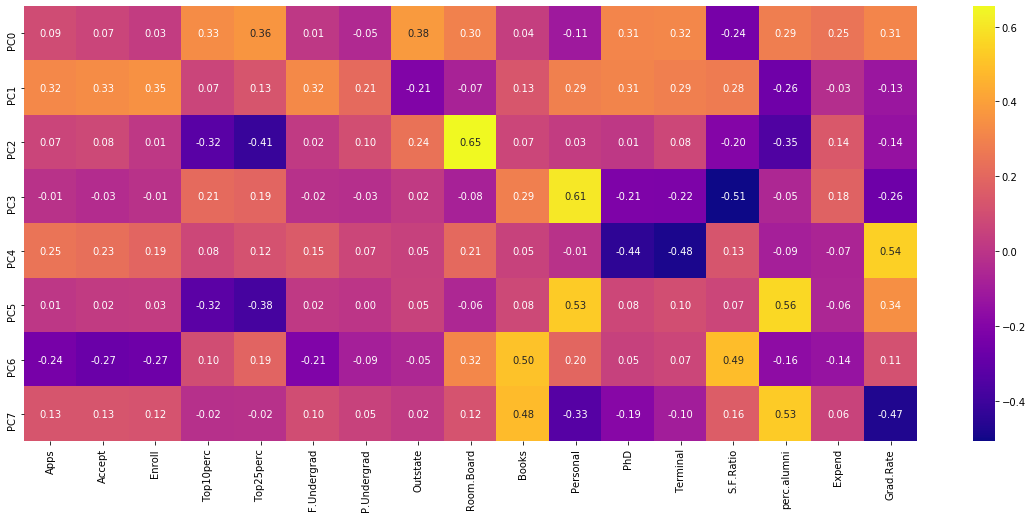

In [182]:
plt.figure(figsize=(20,8))
sns.heatmap(df_comp,cmap='plasma',annot=True,fmt='.2f',yticklabels=['PC0','PC1','PC2','PC3','PC4','PC5','PC6','PC7'])

In [ ]:
#Explicit form of the first PC (in terms of Eigen Vectors).
PC0 = 0.09*Apps + 0.07*Accept + 0.03*Enroll + 0.33*Top10perc + 0.36*Top25perc + 0.01*F.Undergrad + -0.05*P.Undergrad + 0.38*Outstate 
     + 0.30*Room.Board + 0.04*Books + -0.11*Personal + 0.31*PhD + 0.32*Terminal + -0.24*S.F.Ratio + 0.29*perc.alumni 
    + 0.25*Expend + 0.31*Grad.Rate

2.7) Discuss the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?
Perform PCA and export the data of the Principal Component scores into a data frame.


Cummulative Distribution of Eigen values

In [175]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 39.59678608  59.41342686  66.78173685  73.56357563  79.59360308
  83.98041699  87.97341002  91.39770102  94.446702    96.44015349
  97.51785499  98.32974728  99.01164642  99.51612903  99.81437553
  99.93389378 100.        ]


First eight components explain 91.39% of variance in data

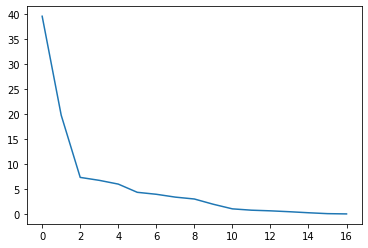

In [176]:
#Scree plot
plt.plot(var_exp)

We will proceed with 8 components here

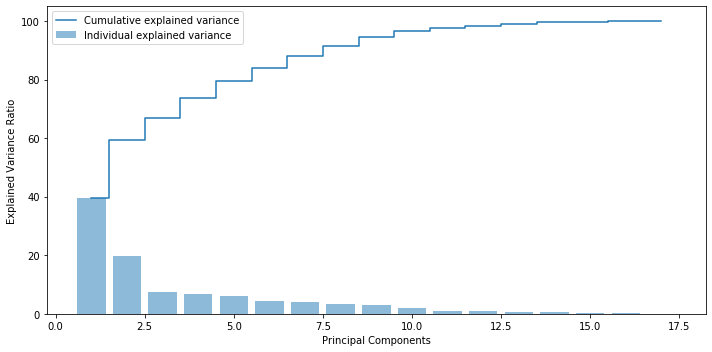

In [177]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

Perform PCA and export the data of the Principal Component scores into a data frame.

In [178]:
from sklearn.decomposition import PCA

# NOTE - we are generating only 8 PCA dimensions (dimensionality reduction from 18 to 8

pca = PCA(n_components=8)
data_reduced = pca.fit_transform(data_new)
data_reduced.transpose()

array([[-1.68925782, -1.81506756, -1.00464371, ..., -0.66446845,
         5.94790152, -0.38662605],
       [ 0.82654612, -1.75137948, -1.5398626 , ...,  0.00677737,
         0.41252047,  0.43267952],
       [-0.62471732,  2.4164196 , -0.40778359, ..., -0.42979899,
         0.12032084, -1.69574496],
       ...,
       [ 0.26571045, -0.17243938, -0.08295623, ..., -1.15034145,
         1.05625824,  0.75185601],
       [ 0.41409853,  0.42976432, -0.81255837, ...,  0.16313136,
        -0.25090762,  0.42392907],
       [-0.99425593,  1.48511993,  0.33969235, ...,  0.86277424,
        -0.01216518, -0.72584273]])

In [179]:
pca.components_

array([[ 0.0929684 ,  0.06592707,  0.03166929,  0.33452816,  0.36427546,
         0.01149875, -0.04622402,  0.37830181,  0.29777508,  0.0401252 ,
        -0.10944135,  0.31241468,  0.31563577, -0.238936  ,  0.28566756,
         0.24699418,  0.31117828],
       [ 0.32104652,  0.3319699 ,  0.35033549,  0.06754279,  0.13142781,
         0.32452837,  0.20972858, -0.20665209, -0.07383062,  0.13395669,
         0.29386253,  0.30728219,  0.28923834,  0.27738993, -0.26160327,
        -0.02920582, -0.12680266],
       [ 0.06660652,  0.07883241,  0.01381154, -0.32328505, -0.41399578,
         0.02193807,  0.1038968 ,  0.2446006 ,  0.65435548,  0.06932308,
         0.02906196,  0.01051885,  0.07534077, -0.19726187, -0.35032544,
         0.14253472, -0.14343185],
       [-0.0129432 , -0.03420729, -0.01122623,  0.21141739,  0.19443136,
        -0.01744947, -0.02676078,  0.02000679, -0.07736692,  0.29066279,
         0.60616613, -0.21336602, -0.22034156, -0.50833033, -0.05443422,
         0.17754101

In [186]:
df_comp = pd.DataFrame(pca.components_,columns=list(data_new))
df_comp

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0  0.092968  0.065927  0.031669   0.334528   0.364275     0.011499   
1  0.321047  0.331970  0.350335   0.067543   0.131428     0.324528   
2  0.066607  0.078832  0.013812  -0.323285  -0.413996     0.021938   
3 -0.012943 -0.034207 -0.011226   0.211417   0.194431    -0.017449   
4  0.246748  0.228775  0.191149   0.077417   0.117971     0.150299   
5  0.006503  0.024874  0.030947  -0.320964  -0.376862     0.016986   
6 -0.240033 -0.272887 -0.265239   0.099748   0.187132    -0.210218   
7  0.131801  0.129178  0.120233  -0.021704  -0.015320     0.100211   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.046224  0.378302    0.297775  0.040125 -0.109441  0.312415  0.315636   
1     0.209729 -0.206652   -0.073831  0.133957  0.293863  0.307282  0.289238   
2     0.103897  0.244601    0.654355  0.069323  0.029062  0.010519  0.075341   
3    -0.026761  0.020007   -0.077367  0.290663  0.606166 -0.213366 -0.220342   
4     0.069900  0.046406    0.205895  0.054402 -0.013263 -0.442567 -0.484983   
5     0.004743  0.051724   -0.055897  0.080912  0.528806  0.076823  0.104341   
6    -0.089379 -0.054712    0.315504  0.504111  0.196612  0.046896  0.068991   
7     0.053796  0.022830    0.119891  0.483937 -0.331425 -0.188372 -0.097810   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0  -0.238936     0.285668  0.246994   0.311178  
1   0.277390    -0.261603 -0.029206  -0.126803  
2  -0.197262    -0.350325  0.142535  -0.143432  
3  -0.508330    -0.054434  0.177541  -0.264098  
4   0.128203    -0.087313 -0.065771   0.543795  
5   0.069896     0.564685 -0.059883   0.341930  
6   0.489263    -0.164598 -0.137819   0.112573  
7   0.160127     0.528548  0.058019  -0.474858

2.8) Mention the business implication of using the Principal Component Analysis for this case study

In [211]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var 

array([39.6, 59.4, 66.8, 73.6, 79.6, 84. , 88. , 91.4])

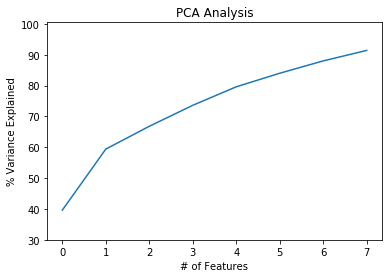

In [212]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)